In [1]:
pip install rdkit biopython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
df = pd.read_csv('no_split_kd.csv')  # adjust filename if needed

In [4]:
df.isna().sum()

SMILES             0
target_sequence    0
Kd                 0
dtype: int64

In [5]:
descriptor_funcs = Descriptors.descList
descriptor_names = [name for name, func in descriptor_funcs]
print(f"Number of descriptors: {len(descriptor_names)}")

Number of descriptors: 217


In [6]:
descriptor_funcs = Descriptors.descList
descriptor_names = [name for name, func in descriptor_funcs]

def extract_all_smiles_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return {name: np.nan for name in descriptor_names}
    return {name: func(mol) for name, func in descriptor_funcs}

smiles_features = df["SMILES"].apply(extract_all_smiles_descriptors)
smiles_df = pd.DataFrame(smiles_features.tolist())

KeyboardInterrupt: 

In [ ]:
def extract_protein_descriptors(seq):
    try:
        a = ProteinAnalysis(seq)
        return {
            "Aromaticity": a.aromaticity(),
            "InstabilityIndex": a.instability_index(),
            "IsoelectricPoint": a.isoelectric_point(),
            "Gravy": a.gravy(),
            "MolecularWeight": a.molecular_weight(),
        }
    except:
        return {key: np.nan for key in [
            "Aromaticity", "InstabilityIndex", "IsoelectricPoint", "Gravy", "MolecularWeight"
        ]}

protein_features = df["target_sequence"].apply(extract_protein_descriptors)
protein_df = pd.DataFrame(protein_features.tolist())

features_df = pd.concat([df["Kd"], smiles_df, protein_df], axis=1)

In [ ]:
correlations = features_df.corr()["Kd"].drop("Kd").sort_values(key=abs, ascending=False)

In [ ]:
top_smiles_corr = correlations[smiles_df.columns].dropna().sort_values(key=abs, ascending=False).head(5)
top_protein_corr = correlations[protein_df.columns].dropna().sort_values(key=abs, ascending=False)

# Combine top features
top_features = list(top_smiles_corr.index) + list(top_protein_corr.index) + ['Kd']
heatmap_data = features_df[top_features]

In [ ]:
print(f"Top SMILES descriptors:\n{top_smiles_corr}")
print(f"Top Protein descriptors:\n{top_protein_corr}")

Top SMILES descriptors:
SlogP_VSA5        0.264943
BCUT2D_CHGHI      0.254146
SMR_VSA5          0.231658
MinEStateIndex   -0.222516
Chi4v             0.218368
Name: Kd, dtype: float64
Top Protein descriptors:
Aromaticity         0.161214
Gravy               0.159513
MolecularWeight    -0.099371
IsoelectricPoint    0.082625
InstabilityIndex   -0.066761
Name: Kd, dtype: float64


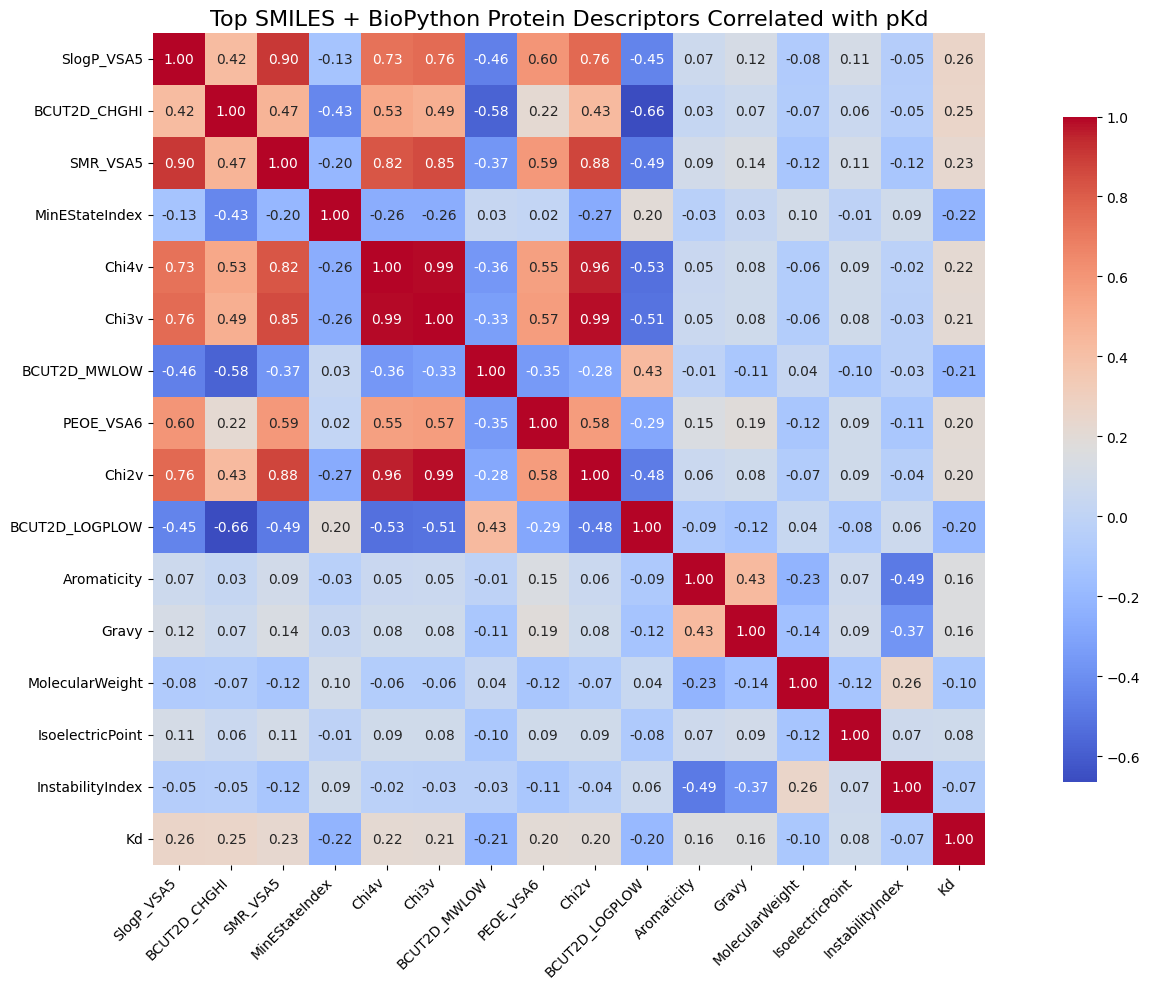

(SlogP_VSA5        0.264943
 BCUT2D_CHGHI      0.254146
 SMR_VSA5          0.231658
 MinEStateIndex   -0.222516
 Chi4v             0.218368
 Chi3v             0.212804
 BCUT2D_MWLOW     -0.210195
 PEOE_VSA6         0.201838
 Chi2v             0.198016
 BCUT2D_LOGPLOW   -0.195698
 Name: Kd, dtype: float64,
 Aromaticity         0.161214
 Gravy               0.159513
 MolecularWeight    -0.099371
 IsoelectricPoint    0.082625
 InstabilityIndex   -0.066761
 Name: Kd, dtype: float64)

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Top SMILES + BioPython Protein Descriptors Correlated with pKd", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

(top_smiles_corr, top_protein_corr)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('no_split_kd.csv')  # adjust filename if needed

In [9]:
df['Kd'] = 10 ** (9 - df['Kd'])

In [10]:
df.head()

,SMILES,target_sequence,Kd
0,BrCCOc1ccc2nc3ccc(=O)cc3oc2c1,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,927.0
1,Br[Se]c1ccccc1,MACTIQKAEALDGAHLMQILWYDEEESLYPAVWLRDNCPCSDCYLD...,11000.0
2,Brc1[nH]c2cccc3[C@H]4C[C@H](CN[C@@H]4Cc1c23)C(...,MELTSEQFNGSQVWIPSPFDLNGSLGPSNGSNQTEPYYDMTSNAVL...,7943.0
3,Brc1[nH]c2cccc3[C@H]4C[C@H](CN[C@@H]4Cc1c23)C(...,MFPNGTAPSPTSSPSSSPGGCGEGVCSRGPGSGAADGMEEPGRNSS...,170.0
4,Brc1c(Br)c(Br)c2[nH]cnc2c1Br,MAGKKVLIVYAHQEPKSFNGSLKNVAVDELSRQGCTVTVSDLYAMN...,18.1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values
kd_values = df['Kd'].dropna()

In [12]:
print("Min Kd:", kd_values.min())
print("Max Kd:", kd_values.max())


Min Kd: 6.000000000000003e-07
Max Kd: 954992586.0199994


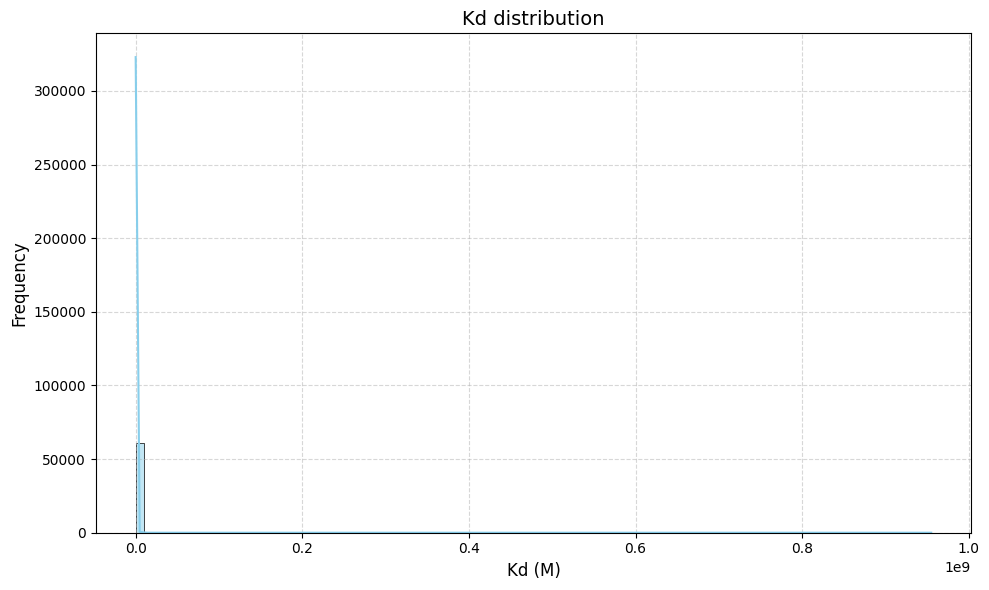

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(kd_values, bins=100, kde=True, color='skyblue', edgecolor='black')
plt.title('Kd distribution', fontsize=14)
plt.xlabel('Kd (M)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [14]:
df['Kd'] = 9 - np.log10(df['Kd'])

In [15]:
kd_values = df['Kd'].dropna()

In [16]:
print("Min Kd:", kd_values.min())
print("Max Kd:", kd_values.max())

Min Kd: 0.020000000000653273
Max Kd: 15.221848749616356


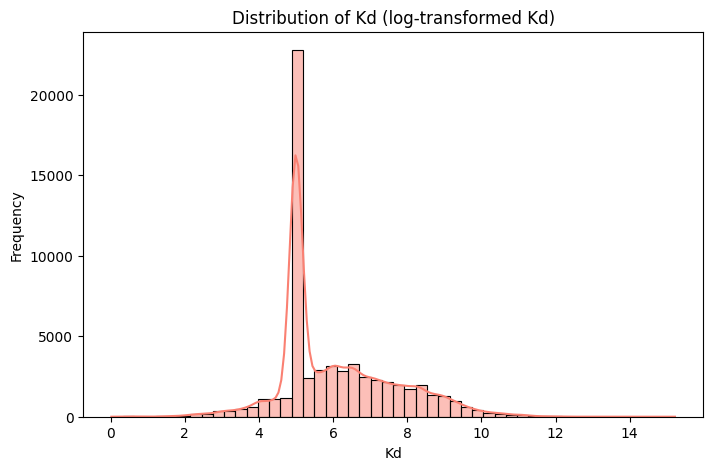

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Kd'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Kd (log-transformed Kd)')
plt.xlabel('Kd')
plt.ylabel('Frequency')
plt.show()

C:\Users\NongNam\AppData\Local\Temp\ipykernel_18588\1406847676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smiles_counts.values, y=smiles_counts.index, palette='viridis')


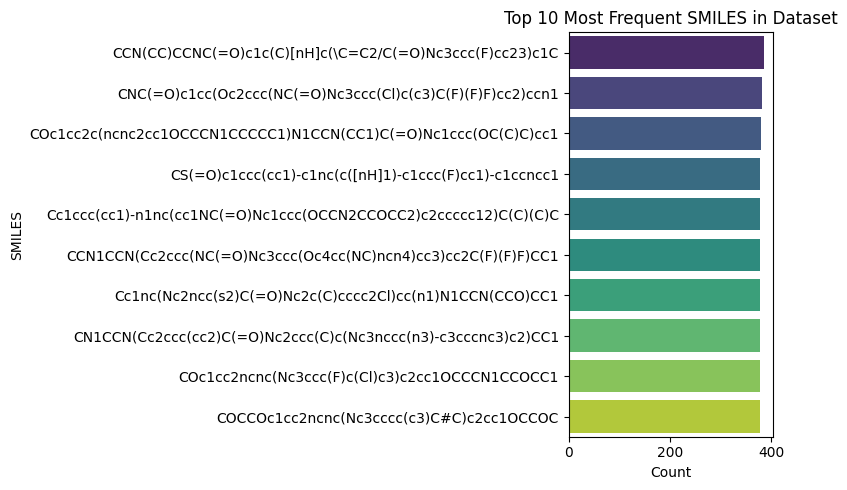

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('no_split_kd.csv')  # adjust filename if needed
# Count SMILES frequencies
smiles_counts = df['SMILES'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=smiles_counts.values, y=smiles_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("SMILES")
plt.title("Top 10 Most Frequent SMILES in Dataset")
plt.tight_layout()
plt.show()


In [23]:
print(smiles_counts.head(10))

SMILES
CCN(CC)CCNC(=O)c1c(C)[nH]c(\C=C2/C(=O)Nc3ccc(F)cc23)c1C            385
CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(c3)C(F)(F)F)cc2)ccn1          382
COc1cc2c(ncnc2cc1OCCCN1CCCCC1)N1CCN(CC1)C(=O)Nc1ccc(OC(C)C)cc1     379
CS(=O)c1ccc(cc1)-c1nc(c([nH]1)-c1ccc(F)cc1)-c1ccncc1               378
Cc1ccc(cc1)-n1nc(cc1NC(=O)Nc1ccc(OCCN2CCOCC2)c2ccccc12)C(C)(C)C    378
CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)cc2C(F)(F)F)CC1      378
Cc1nc(Nc2ncc(s2)C(=O)Nc2c(C)cccc2Cl)cc(n1)N1CCN(CCO)CC1            377
CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1      377
COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1                     377
COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC                           377
Name: count, dtype: int64


C:\Users\NongNam\AppData\Local\Temp\ipykernel_18588\4100889397.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smiles_counts.values, y=smiles_counts.index, palette='viridis')


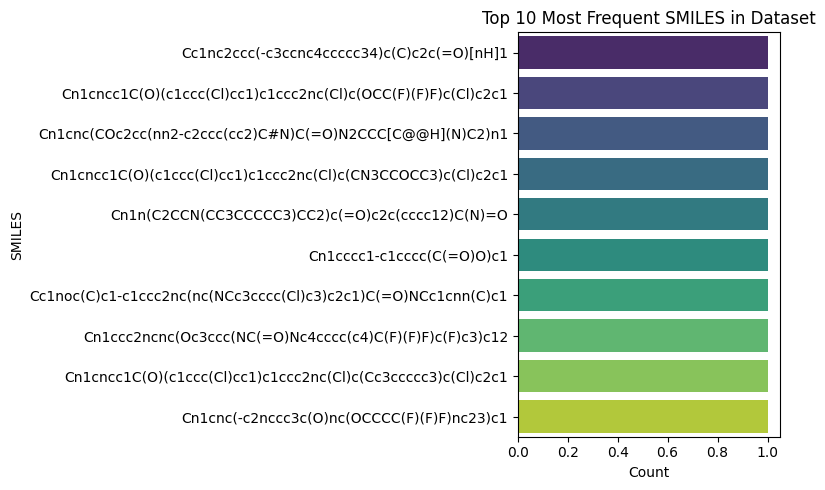

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('no_split_kd.csv')  # adjust filename if needed
# Count SMILES frequencies
smiles_counts = df['SMILES'].value_counts().nsmallest(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=smiles_counts.values, y=smiles_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("SMILES")
plt.title("Top 10 Most Frequent SMILES in Dataset")
plt.tight_layout()
plt.show()

In [29]:
print(smiles_counts.tail(10))

SMILES
Cc1nc2ccc(-c3ccnc4ccccc34)c(C)c2c(=O)[nH]1                       1
Cn1cncc1C(O)(c1ccc(Cl)cc1)c1ccc2nc(Cl)c(OCC(F)(F)F)c(Cl)c2c1     1
Cn1cnc(COc2cc(nn2-c2ccc(cc2)C#N)C(=O)N2CCC[C@@H](N)C2)n1         1
Cn1cncc1C(O)(c1ccc(Cl)cc1)c1ccc2nc(Cl)c(CN3CCOCC3)c(Cl)c2c1      1
Cn1n(C2CCN(CC3CCCCC3)CC2)c(=O)c2c(cccc12)C(N)=O                  1
Cn1cccc1-c1cccc(C(=O)O)c1                                        1
Cc1noc(C)c1-c1ccc2nc(nc(NCc3cccc(Cl)c3)c2c1)C(=O)NCc1cnn(C)c1    1
Cn1ccc2ncnc(Oc3ccc(NC(=O)Nc4cccc(c4)C(F)(F)F)c(F)c3)c12          1
Cn1cncc1C(O)(c1ccc(Cl)cc1)c1ccc2nc(Cl)c(Cc3ccccc3)c(Cl)c2c1      1
Cn1cnc(-c2nccc3c(O)nc(OCCCC(F)(F)F)nc23)c1                       1
Name: count, dtype: int64


C:\Users\NongNam\AppData\Local\Temp\ipykernel_42348\1913653389.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SMILES', y='Kd', data=top_smiles_df, palette='muted')


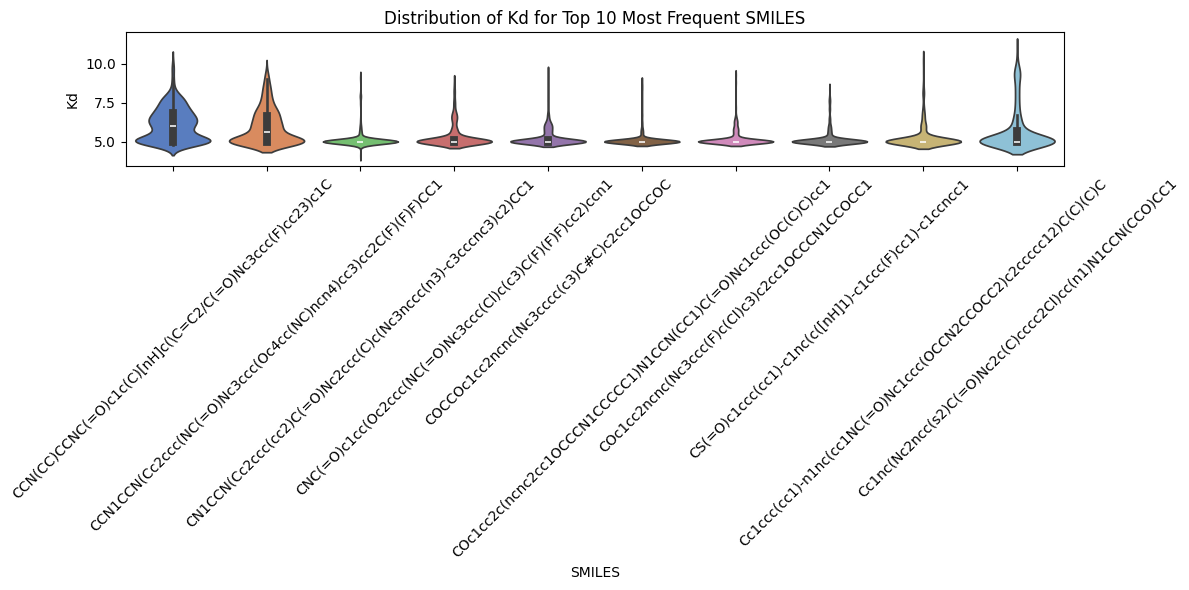

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 10 most frequent SMILES
top_smiles = df['SMILES'].value_counts().nlargest(10).index

# Filter only those top SMILES
top_smiles_df = df[df['SMILES'].isin(top_smiles)].copy()

# Plot distribution using violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x='SMILES', y='Kd', data=top_smiles_df, palette='muted')
plt.title("Distribution of Kd for Top 10 Most Frequent SMILES")
plt.xlabel("SMILES")
plt.ylabel("Kd")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Total number of SMILES entries
total_smiles = df['SMILES'].shape[0]

# Number of unique SMILES
unique_smiles = df['SMILES'].nunique()

print(f"Total SMILES entries: {total_smiles}")
print(f"Unique SMILES: {unique_smiles}")


Total SMILES entries: 61124
Unique SMILES: 20743


In [ ]:
df = pd.read_csv('Target_ID/no_split.csv')  # adjust filename if needed

In [ ]:
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Return full species name instead of boolean
def get_species_name(uniprot_id):
    try:
        url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            data = response.json()
            organism = data.get("organism", {}).get("scientificName", "")
            return uniprot_id, organism
    except Exception:
        pass
    return uniprot_id, "Unknown"

def get_species_for_all(protein_ids, max_workers=8):
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(get_species_name, pid): pid for pid in protein_ids}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Getting species"):
            pid, species = future.result()
            results[pid] = species
    return results


# Get unique target protein IDs
protein_ids = df['target_id'].dropna().unique().tolist()

# Get species name for each UniProt ID
species_results = get_species_for_all(protein_ids)

# Map back to your DataFrame
df['species_name'] = df['target_id'].map(species_results)

# Preview
print(df[['target_id', 'species_name']].drop_duplicates().head())

Getting species: 100%|██████████| 2809/2809 [06:08<00:00,  7.63it/s]


  target_id       species_name
0    P05067       Homo sapiens
1    O75936       Homo sapiens
2    P28646  Rattus norvegicus
3    P30680  Rattus norvegicus
4    P16083       Homo sapiens


In [ ]:
# Count how many rows are Homo sapiens
homo_sapiens_count = df[df['species_name'] == 'Homo sapiens'].shape[0]

# Count how many unique species are in the dataset
unique_species_count = df['species_name'].nunique()

# Count rows per species (optional for a full breakdown)
species_distribution = df['species_name'].value_counts()

# Print the results
print(f"Number of rows with species 'Homo sapiens': {homo_sapiens_count}")
print(f"Number of unique species: {unique_species_count}")
print("\nTop 10 most common species:")
print(species_distribution.head(10))


Number of rows with species 'Homo sapiens': 53719
Number of unique species: 479

Top 10 most common species:
species_name
Homo sapiens                                                                                                         53719
Rattus norvegicus                                                                                                     1721
Cavia porcellus                                                                                                        928
Mus musculus                                                                                                           840
Escherichia coli (strain K12)                                                                                          367
Bos taurus                                                                                                             345
Mycobacterium tuberculosis (strain ATCC 25618 / H37Rv)                                                                 251
Oryctolagus cunic

In [ ]:
homo_unique_targets = df[df['species_name'] == 'Homo sapiens']['target_id'].nunique()
print(f"Number of unique Homo sapiens target IDs: {homo_unique_targets}")


Number of unique Homo sapiens target IDs: 1321


In [ ]:
import requests
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_uniprot_info_extended(uniprot_id):
    try:
        url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
        response = requests.get(url, timeout=10)
        if response.status_code != 200:
            return None
        data = response.json()

        # Sequence length
        length = data.get("sequence", {}).get("length", None)

        # Protein name / function
        protein_name = data.get("proteinDescription", {}).get("recommendedName", {}).get("fullName", {}).get("value", "")

        # Gene Ontology (GO terms)
        go_terms = [
            ref['properties']['term']
            for ref in data.get("uniProtKBCrossReferences", [])
            if ref.get("database") == "GO"
        ]
        go_term_str = "; ".join(go_terms)

        return {
            "UniProtID": uniprot_id,
            "ProteinLength": length,
            "ProteinName": protein_name,
            "GOTerms": go_term_str
        }

    except Exception as e:
        return {
            "UniProtID": uniprot_id,
            "ProteinLength": None,
            "ProteinName": None,
            "GOTerms": None
        }

def fetch_all_metadata(protein_ids, max_workers=8):
    results = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(fetch_uniprot_info_extended, pid): pid for pid in protein_ids}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Fetching UniProt Metadata"):
            result = future.result()
            if result:
                results.append(result)
    return pd.DataFrame(results)

# Get unique UniProt IDs
unique_ids = df['target_id'].dropna().unique().tolist()

# Fetch metadata
metadata_df = fetch_all_metadata(unique_ids)

# Merge into your original df
df = df.merge(metadata_df, left_on='target_id', right_on='UniProtID', how='left')


Fetching UniProt Metadata: 100%|██████████| 2809/2809 [05:58<00:00,  7.85it/s]


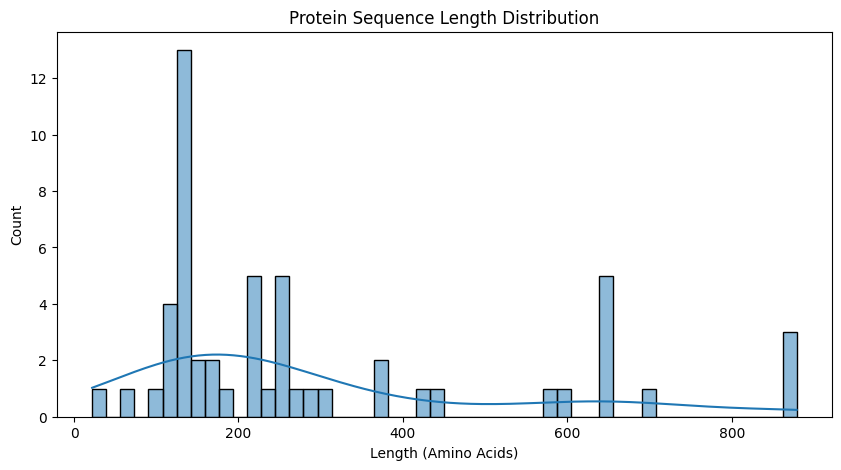

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['ProteinLength'].dropna(), bins=50, kde=True)
plt.title("Protein Sequence Length Distribution")
plt.xlabel("Length (Amino Acids)")
plt.show()


C:\Users\NongNam\AppData\Local\Temp\ipykernel_42348\15501214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_proteins.index, x=top_proteins.values, palette="Blues_d")


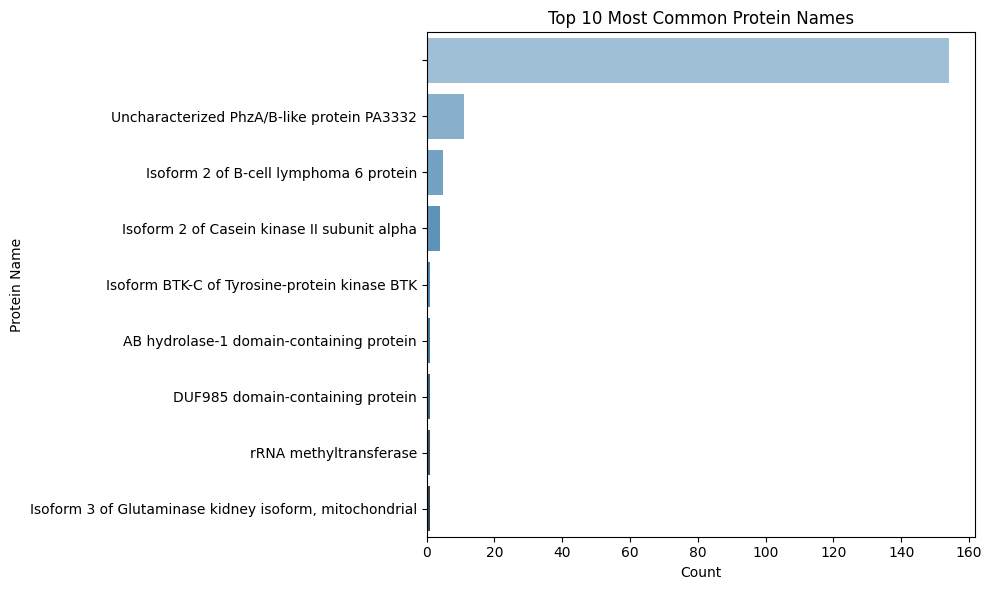

In [ ]:
top_proteins = df['ProteinName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_proteins.index, x=top_proteins.values, palette="Blues_d")
plt.title("Top 10 Most Common Protein Names")
plt.xlabel("Count")
plt.ylabel("Protein Name")
plt.tight_layout()
plt.show()
